# Assignment 1: Data Visualisation

In [30]:
# import libraries

import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import requests

from labellines import labelLines

## Data source 1: Postpartum Depression (PDD)

In [31]:
ppd_path = kagglehub.dataset_download("parvezalmuqtadir2348/postpartum-depression")
ppd_df = pd.read_csv(f"{ppd_path}/post natal data.csv")

### Data 1 Exploration

In [32]:
ppd_df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [33]:
ppd_df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [34]:
ppd_df = ppd_df.dropna()

In [35]:
ppd_df['Suicide attempt'].unique()

<StringArray>
['Yes', 'No', 'Not interested to say']
Length: 3, dtype: str

## Plot 1: 30% of Postpartum Respondents Attempted Suicide

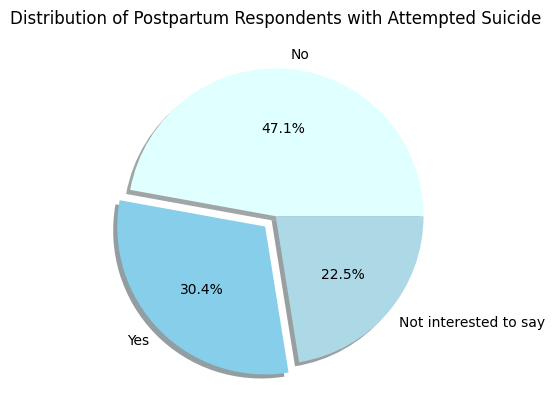

In [36]:
labels = ['No', 'Yes', 'Not interested to say']
colors = ['lightcyan', 'skyblue', 'lightblue']
explode = (0, 0.1, 0)

plt.pie(ppd_df['Suicide attempt'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow={'edgecolor': 'none'})
plt.title('Distribution of Postpartum Respondents with Attempted Suicide')

plt.show()

## Data source 2: Mental health in the pregnancy during the COVID-19 pandemic

In [37]:
pmh_path = kagglehub.dataset_download("yeganehbavafa/mental-health-in-the-pregnancy-during-the-covid-19")
pmh_df = pd.read_csv(f"{pmh_path}/Pregnancy During the COVID-19 Pandemic.csv")

### Data 2 Exploration

In [38]:
pmh_df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [39]:
pmh_df.isnull().sum()

OSF_ID                                           0
Maternal_Age                                   111
Household_Income                               251
Maternal_Education                             177
Edinburgh_Postnatal_Depression_Scale          1174
PROMIS_Anxiety                                1206
Gestational_Age_At_Birth                      4038
Delivery_Date(converted to month and year)    4039
Birth_Length                                  5292
Birth_Weight                                  4694
Delivery_Mode                                 5235
NICU_Stay                                     5238
Language                                         0
Threaten_Life                                    0
Threaten_Baby_Danger                             0
Threaten_Baby_Harm                               0
dtype: int64

In [40]:
pmh_df = pmh_df.dropna(subset=['Household_Income', 'Edinburgh_Postnatal_Depression_Scale'])
pmh_df['Household_Income'] = pmh_df['Household_Income'].str.replace('Less than ', '<')

In [41]:
pmh_df['Household_Income'].unique()

<StringArray>
[          '$200,000+',  '$100,000 -$124,999',     '$40,000-$69,999',
 '$150,000 - $174,999',     '$70,000-$99,999',  '$175,000- $199,999',
  '$125,000- $149,999',    '$20,000- $39,999',           '<$20, 000']
Length: 9, dtype: str

In [42]:
pmh_df['Maternal_Education'].unique()

<StringArray>
[               'Masters degree',          'Undergraduate degree',
           'High school diploma',          'College/trade school',
 'Less than high school diploma',               'Doctoral Degree']
Length: 6, dtype: str

In [43]:
income_order = ['<$20, 000',
                '$20,000- $39,999',
                '$40,000-$69,999',
                '$70,000-$99,999',
                '$100,000 -$124,999',
                '$125,000- $149,999',
                '$150,000 - $174,999',
                '$175,000- $199,999',
                '$200,000+']
pmh_df['Household_Income'] = pd.Categorical(pmh_df['Household_Income'],
                                            ordered=True,
                                            categories=income_order)

In [44]:
education_order = ['Less than high school diploma',
                   'High school diploma',
                   'College/trade school',
                   'Undergraduate degree',
                   'Masters degree',
                   'Doctoral Degree']
pmh_df['Maternal_Education'] = pd.Categorical(pmh_df['Maternal_Education'],
                                              ordered=True,
                                              categories=education_order)

In [45]:
pmh_df.groupby(['Household_Income', 'Edinburgh_Postnatal_Depression_Scale']).size().unstack(fill_value=0)

Edinburgh_Postnatal_Depression_Scale,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Household_Income,,,,,,,,,,,,,,,,,,,,,
"<$20, 000",1,2,1,6,6,6,9,6,9,9,...,6,6,2,1,4,0,4,0,0,0
"$20,000- $39,999",6,4,10,21,17,19,15,20,19,35,...,14,16,11,2,6,3,2,0,2,1
"$40,000-$69,999",25,27,23,30,46,44,53,61,74,75,...,33,16,19,13,3,5,1,3,1,0
"$70,000-$99,999",38,38,55,77,93,100,97,109,96,143,...,30,18,9,9,7,3,1,0,1,0
"$100,000 -$124,999",48,42,61,78,76,85,117,100,128,140,...,11,6,8,9,2,2,0,0,0,0
"$125,000- $149,999",21,29,42,66,62,64,62,81,96,92,...,8,11,4,2,5,1,2,0,0,0
"$150,000 - $174,999",29,32,46,57,60,59,72,64,79,79,...,12,6,2,1,1,1,0,0,0,0
"$175,000- $199,999",13,19,25,41,41,41,46,47,34,31,...,5,4,3,1,0,0,0,0,0,0
"$200,000+",27,34,48,55,45,63,72,60,60,61,...,5,5,2,2,1,0,0,0,0,0


In [46]:
pmh_df.groupby(['Maternal_Education', 'Edinburgh_Postnatal_Depression_Scale']).size().unstack(fill_value=0)

Edinburgh_Postnatal_Depression_Scale,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Maternal_Education,,,,,,,,,,,,,,,,,,,,,
Less than high school diploma,2,0,2,3,4,3,1,5,2,5,...,5,5,3,2,3,1,0,0,0,0
High school diploma,11,9,17,22,26,31,30,34,41,52,...,18,12,7,4,2,4,2,1,1,0
College/trade school,51,45,67,86,96,108,122,120,140,145,...,52,37,24,15,11,7,6,2,2,1
Undergraduate degree,82,94,110,181,173,199,223,247,229,279,...,40,21,20,14,8,3,2,0,1,0
Masters degree,41,54,80,91,106,93,127,99,132,115,...,3,11,4,4,4,0,0,0,0,0
Doctoral Degree,21,25,35,48,41,47,40,43,51,69,...,6,2,2,1,1,0,0,0,0,0


## Plot 2a: Mean Edinburgh Postnatal Depression Scale Score Increases as Household Income Decreases

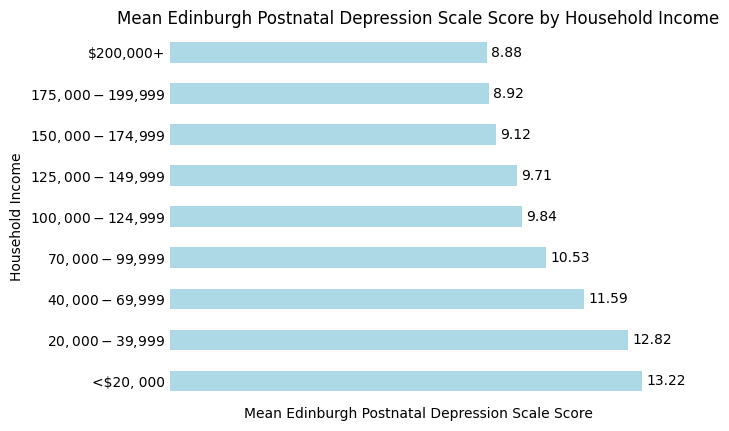

In [47]:
ax = pmh_df.groupby('Household_Income').Edinburgh_Postnatal_Depression_Scale.mean().round(2).plot.barh(color='lightblue',
                                                                                                       title='Mean Edinburgh Postnatal Depression Scale Score by Household Income')

# Add labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xlabel('Mean Edinburgh Postnatal Depression Scale Score')
plt.ylabel('Household Income')

plt.xticks([])
ax.tick_params(axis='y', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Plot 2b: Mean Edinburgh Postnatal Depression Scale Score Increases as Maternal Education Decreases

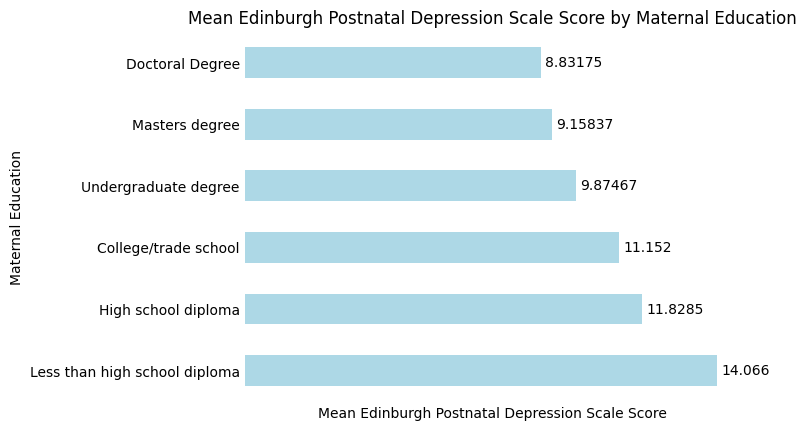

In [48]:
ax = pmh_df.groupby('Maternal_Education').Edinburgh_Postnatal_Depression_Scale.mean().plot.barh(color='lightblue',
                                                                                               title='Mean Edinburgh Postnatal Depression Scale Score by Maternal Education')

# Add labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xlabel('Mean Edinburgh Postnatal Depression Scale Score')
plt.ylabel('Maternal Education')

plt.xticks([])
ax.tick_params(axis='y', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

### EPDS Severity Range

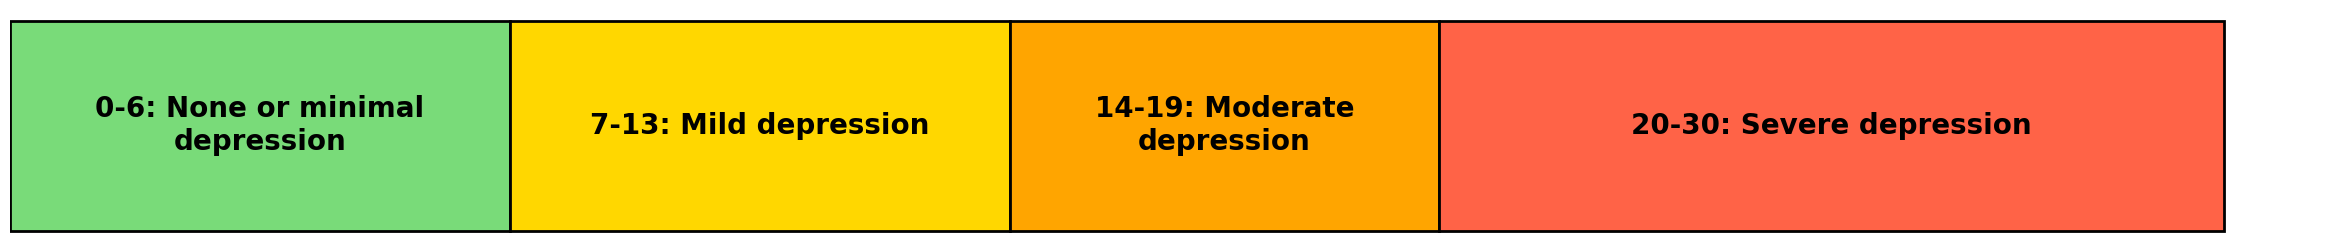

In [49]:
labels = ['0-6: None or minimal\ndepression', '7-13: Mild depression', '14-19: Moderate\ndepression', '20-30: Severe depression']
colors = ["#79DB79", '#FFD700', '#FFA500', '#FF6347']
ranges = [(0, 6), (7, 13), (14, 19), (20, 30)]

# Calculate widths
widths = [r[1] - r[0] + 1 for r in ranges]

# Create figure
fig, ax = plt.subplots(figsize=(30, 3))

left = 0
for _, (width, color, label) in enumerate(zip(widths, colors, labels)):
    ax.barh('EPDS', width, left=left, color=color, edgecolor='black', linewidth=2)
    
    # Add labels
    mid_point = left + width/2
    ax.text(mid_point, 0, label, ha='center', va='center', 
            fontweight='bold', fontsize=20)
    
    left += width

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Data source 3: Annual Live-Births By Place of Occurrence, Singapore

In [50]:
dataset_id = "d_b8b0ed0ab6df784fbe33f0dba4aacb4e"
url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
        
response = requests.get(url)
lbp_df = pd.json_normalize(response.json()['result']['records'])

In [51]:
lbp_df.head()

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2017,2018,2019,2020,2021,2022,2023,2024,_id,DataSeries
0,39441,40779,41217,42250,42654,40585,41556,42484,38379,43616,...,39615,39039,39279,38590,38672,35605,33541,33703,1,Total Live-Births By Place Of Occurrence
1,33242,34354,33970,33872,33437,30695,30500,30456,25896,26212,...,17911,18375,18230,18262,18733,17899,17454,17791,2,Public Sector Hospitals
2,4008,4441,5041,6576,7892,8858,10337,11375,12054,17004,...,21497,20476,20840,20127,19766,17520,15938,15770,3,Private Sector Hospitals
3,1029,826,962,945,913,695,423,394,292,269,...,207,188,209,201,173,186,149,142,4,Other Locations


In [52]:
lbp_df = lbp_df.drop(columns=['_id'])

lbp_df = lbp_df.melt(
    id_vars='DataSeries',
    var_name='Year',
    value_name='Live_Births'
)

lbp_df['Live_Births'] = pd.to_numeric(lbp_df['Live_Births'])
lbp_df['Year'] = pd.to_numeric(lbp_df['Year'])
lbp_df = lbp_df[lbp_df['Year'] >= 2000]

In [53]:
lbp_df['DataSeries'].unique()

<StringArray>
['Total Live-Births By Place Of Occurrence',
              '    Public Sector Hospitals',
             '    Private Sector Hospitals',
                      '    Other Locations']
Length: 4, dtype: str

In [54]:
lbp_df['DataSeries'] = lbp_df['DataSeries'].str.strip()

# Filter for Public and Private Sector Hospitals
lbp_df = lbp_df[lbp_df['DataSeries'].isin(['Public Sector Hospitals',
                                           'Private Sector Hospitals'
                                           ])]

In [55]:
# Calculate Proportion of Live Births
lbp_df['Proportion_Live_Births'] = lbp_df['Live_Births'] / lbp_df.groupby('Year')['Live_Births'].transform('sum')

In [56]:
lbp_df_pivot = lbp_df.pivot(
    index='Year',
    columns='DataSeries',
    values='Proportion_Live_Births'
).reset_index()

lbp_df_pivot.columns.name = None

In [57]:
lbp_df_pivot.tail()

,Year,Private Sector Hospitals,Public Sector Hospitals
20,2020,0.524291,0.475709
21,2021,0.513416,0.486584
22,2022,0.494650,0.505350
23,2023,0.477300,0.522700
24,2024,0.469891,0.530109


## Plot 3: Increasing Proportion of Live Births in Public Sector Hospitals Compared to Private Sector Hospitals

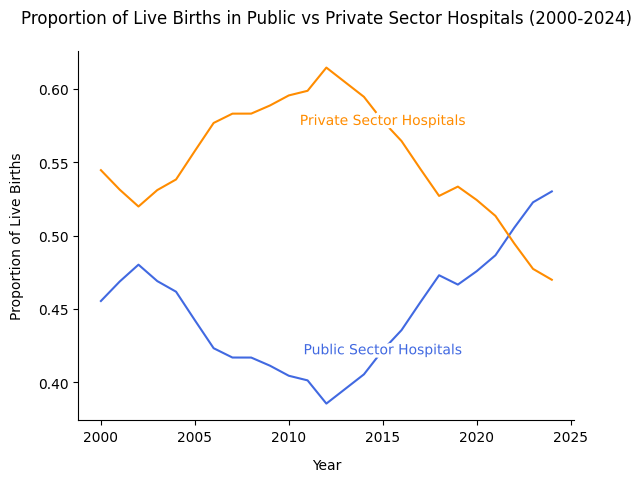

In [58]:
plt.plot(lbp_df_pivot['Year'], lbp_df_pivot['Public Sector Hospitals'], label='Public Sector Hospitals', color='royalblue')
plt.plot(lbp_df_pivot['Year'], lbp_df_pivot['Private Sector Hospitals'], label='Private Sector Hospitals', color='darkorange')

ax = plt.gca()

# Add labels
xvals = [2015, 2015]
labelLines(ax.get_lines(), align=False, xvals=xvals)

plt.title('Proportion of Live Births in Public vs Private Sector Hospitals (2000-2024)', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Proportion of Live Births', labelpad=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)